In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_path = './dataset/ipl/'
file_name = 'matches.csv'

match_data = pd.read_csv(dir_path+file_name)
match_data.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Handling null values
<p> <em>Umpires</em> has lot of null values and is not significant for any further analysis. So drop these columns</p>

In [4]:
print('Rows: {}, Columns: {}'.format(match_data.shape[0], match_data.shape[1]))

Rows: 756, Columns: 18


In [5]:
match_data = match_data.iloc[:,:15]
match_data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

<p>There are 4 <em>no result</em> entries in the winner column. Better to drop these rows.</p>

In [6]:
match_data.dropna(axis=0, subset=['winner','result'], inplace=True)

### Gathering insights

In [7]:
seasons = sorted(match_data['season'].unique())
print('\033[1mSeasons:\033[0m {}, \nCount: {}'.format(seasons, len(seasons)))

print('\033[1mResult:\033[0m {}'.format(match_data['result'].unique()))
print('\033[1mToss decision:\033[0m {}'.format(match_data['toss_decision'].unique()))
print('\033[1mDL applied:\033[0m {}'.format(match_data['dl_applied'].unique()))

teams = pd.concat([match_data['team1'],match_data['team2']]).unique()
print('\033[1mTeams:\033[0m \n{}, \nCount: {}'.format(teams, len(teams)))
print('\033[1mCities:\033[0m \n{}'.format(match_data['city'].unique()))

Seasons: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
Count: 12
Result: ['normal' 'tie']
Toss decision: ['field' 'bat']
DL applied: [0 1]
Teams: 
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals'], 
Count: 15
Cities: 
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


<p>Clearly there are inconsistencies in the data: <strong>Teams</strong> has <em>Rising Pune Supergiant</em> and <em>Rising Pune Supergiants</em> while <strong>Cities</strong> has <em>Bengaluru</em> and <em>Bangalore</em></p>
Resolve these inconsistencies.

In [8]:
# 'Rising Pune Supergiant === Rising Pune Supergiants
match_data.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace = True)
teams = pd.concat([match_data['team1'],match_data['team2']]).unique()
print('\033[1mTeams:\033[0m \n{}, \nCount: {}'.format(teams, len(teams)))

# Bengaluru === Bangalore
match_data.replace('Bangalore','Bengaluru', inplace=True)
print('\033[1mCities:\033[0m \n{}'.format(match_data['city'].unique()))

Teams: 
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Delhi Capitals'], 
Count: 14
Cities: 
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bengaluru' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali']


### Toss wins by each team over all seasons

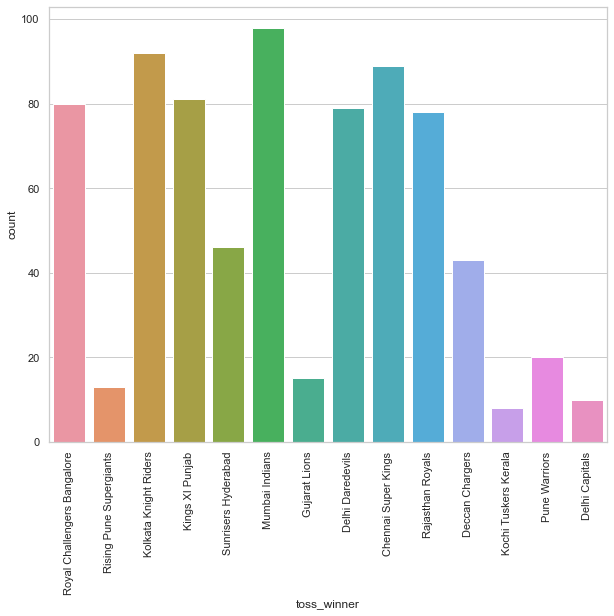

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
ax = sns.countplot(x='toss_winner', data=match_data)
ax.tick_params(axis='x', rotation=90)

### Get season wise information

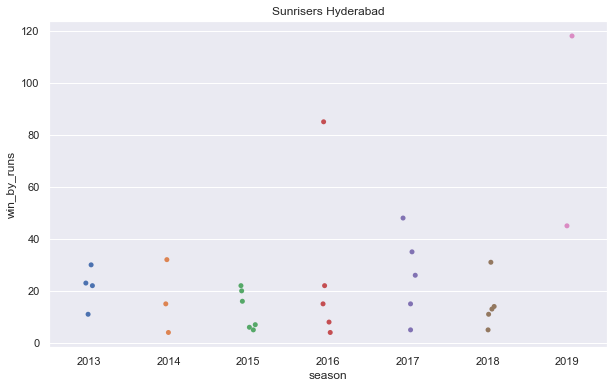

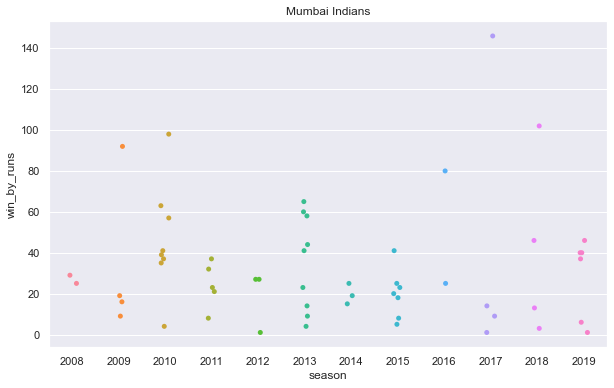

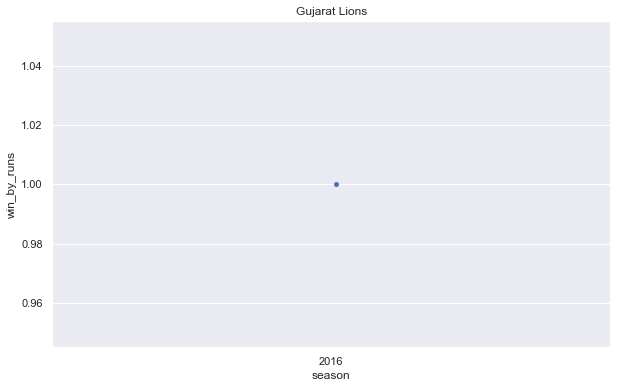

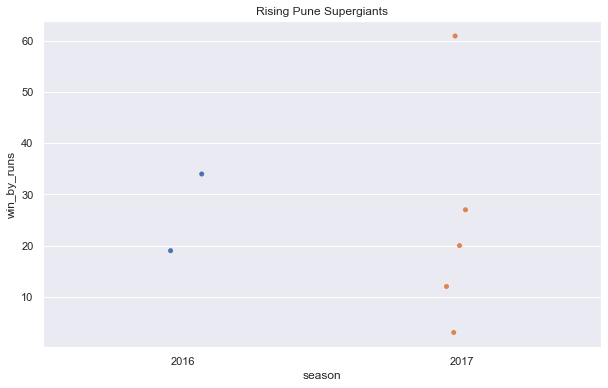

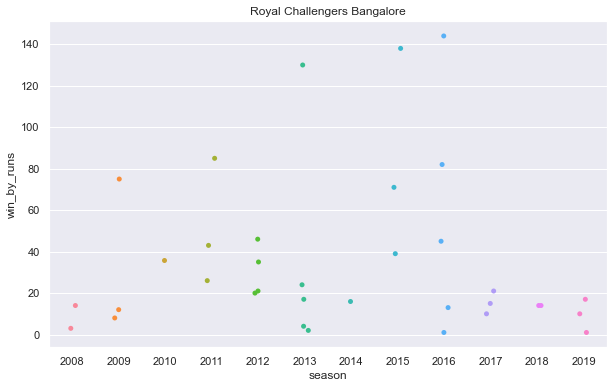

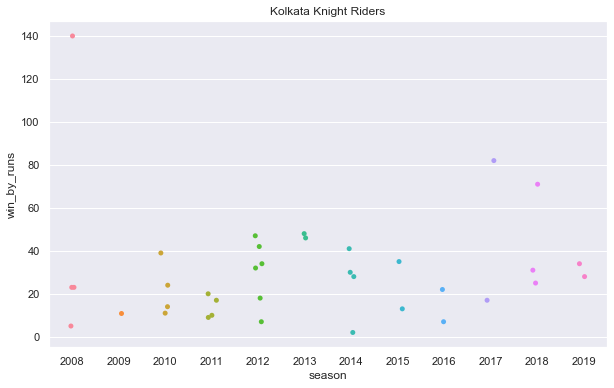

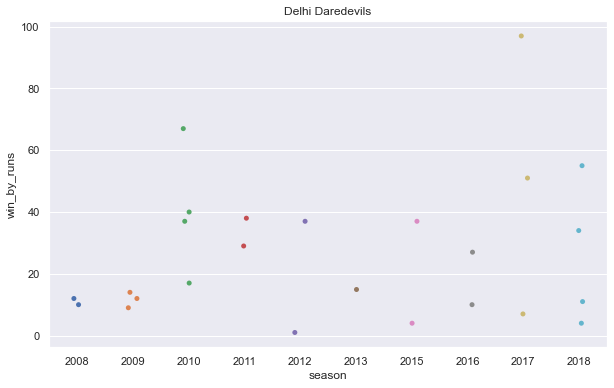

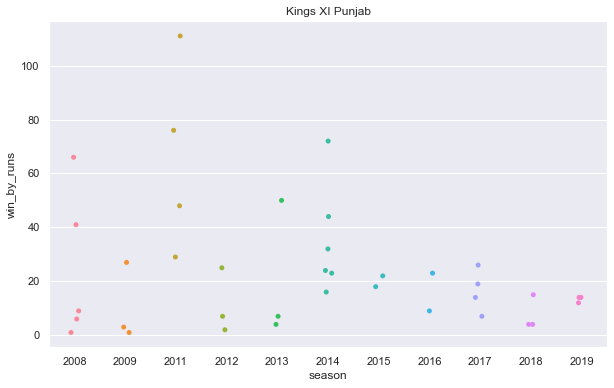

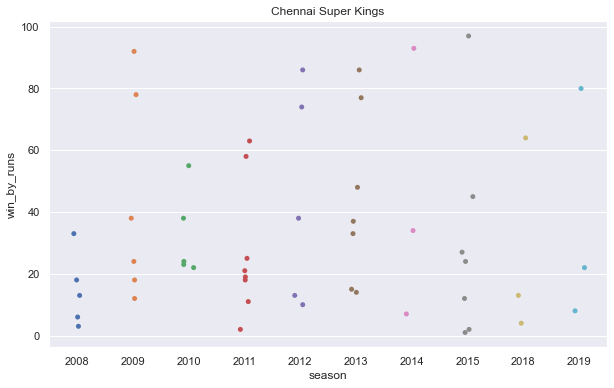

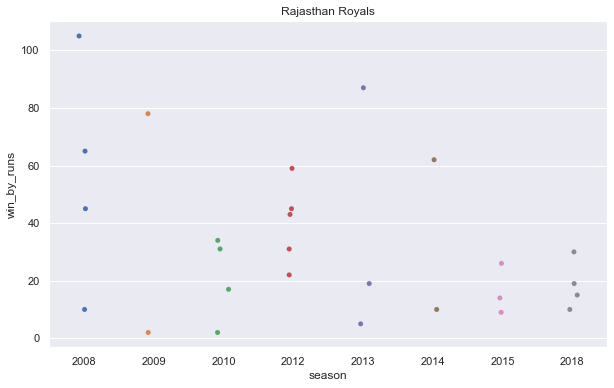

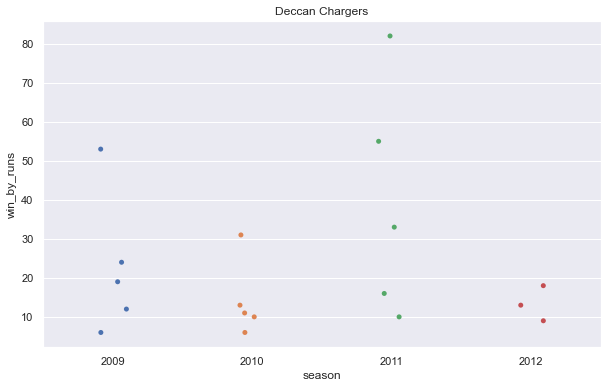

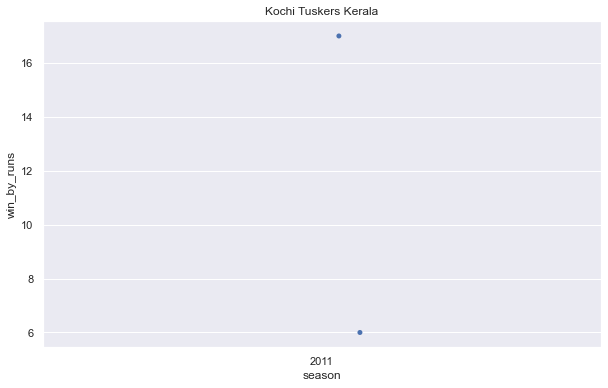

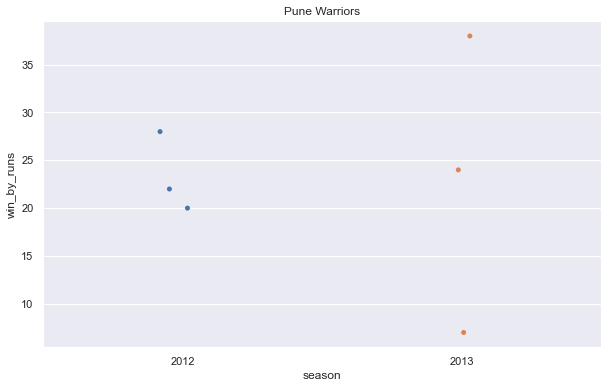

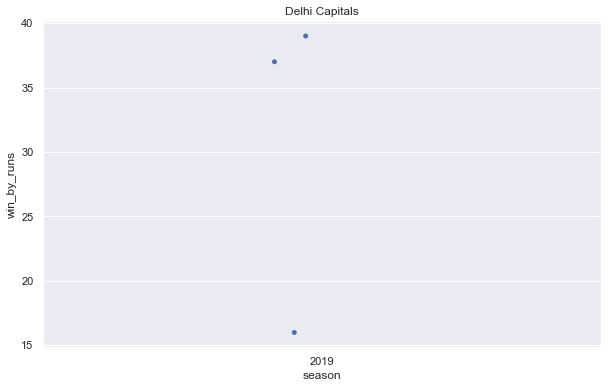

In [10]:
def get_info(team: str, season: int):
    subset = match_data.loc[(match_data['winner']==team) & (match_data[season]!=0)]
    sns.set(rc={'figure.figsize':(10,6)})
    sns.stripplot(x='season',y=season, data=subset).set(title = team)
    plt.show(sns)

for i in teams:
    get_info(i, 'win_by_runs')

In [11]:
group = match_data.groupby(['winner'])

toss_match = match_data[match_data['toss_winner'] == match_data['winner']]
toss_field = (toss_match[toss_match['toss_decision'] == 'field'])
toss_bat = (toss_match[toss_match['toss_decision'] == 'bat'])

print('Number of matches where the toss winner won the match: {}'.format(toss_match.shape[0]))
print('Number of matches where the toss winner who chose to field won the match: {}'.format(toss_field.shape[0]))
print('Number of matches where the toss winner who chose to bat won the match: {}'.format(toss_bat.shape[0]))

Number of matches where the toss winner won the match: 393
Number of matches where the toss winner who chose to field won the match: 259
Number of matches where the toss winner who chose to bat won the match: 134


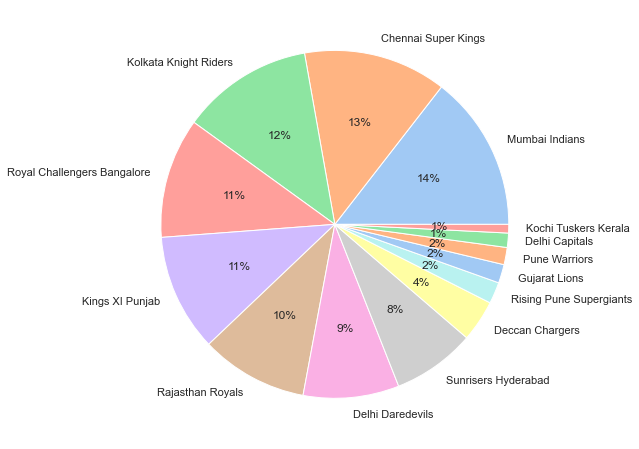

In [12]:
won = dict(match_data['winner'].value_counts())
labels = list(won.keys())
data = [won[i] for i in labels]
colors = sns.color_palette('pastel')[:len(data)]
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Wins of a team in a particular city

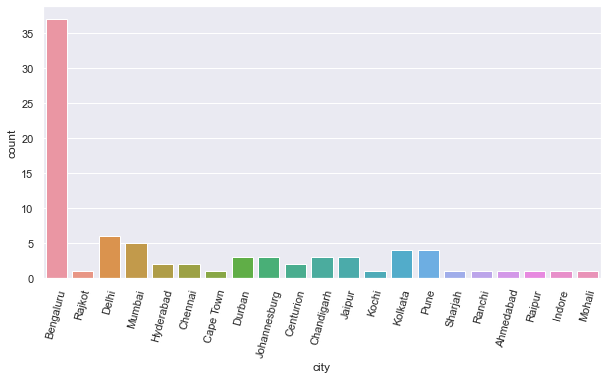

In [13]:
rcb_wins = match_data[match_data['winner'] == 'Royal Challengers Bangalore']
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='city', data=rcb_wins)
ax.tick_params(axis='x', rotation=75)

In [14]:
# sns.set(rc={'figure.figsize':(15,12)})
# ax = sns.catplot(x="city",col='winner', kind="count", data=match_data, height=7, aspect = 2)

***All teams have exceptional performance in home ground!***

In [15]:
# CSK Toss wins and match wins
csk_wins = match_data[(match_data['toss_winner'] == 'Chennai Super Kings') & (match_data['winner'] == 'Chennai Super Kings')].shape[0]
total_matches = match_data.shape[0]
win_percentage = csk_wins/total_matches * 100
print("Toss winner is CSK and match winner is also CSK", win_percentage)

Toss winner is CSK and match winner is also CSK 7.579787234042554


### Deliveries data

In [16]:
dir_path = './dataset/ipl/'
file_name = 'deliveries.csv'

deliveries = pd.read_csv(dir_path + file_name)

In [17]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

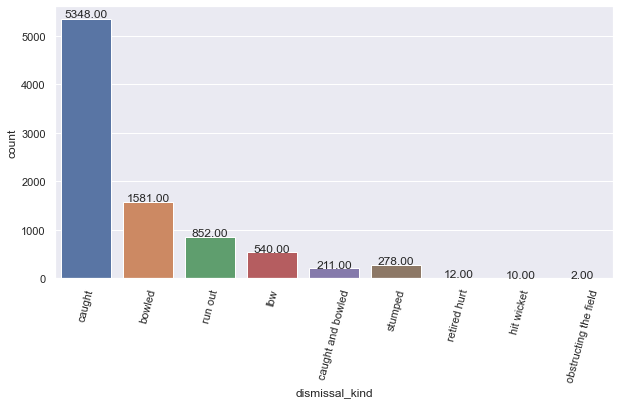

In [18]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() * 1.01
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

dismissal_kind = deliveries['dismissal_kind'].unique()
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='dismissal_kind', data=deliveries)
ax.tick_params(axis='x', rotation=75)
show_values_on_bars(ax)

### Top five scoring batsman

In [19]:
modified = deliveries.copy(deep=True)
# modified.drop(modified.iloc[:,0:6], inplace=True, axis=1)
# modified.drop(modified.iloc[:,1:5], inplace=True, axis=1)

runs_by_each = modified.groupby(['batsman']).sum()['batsman_runs']
top_five = runs_by_each.nlargest(5)
top_five

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

### Overwise statistics

In [20]:
overwise = deliveries.copy(deep=True)
overwise.drop(['fielder','dismissal_kind'], axis=1, inplace=True)
overwise.fillna(0, inplace=True)
overwise['player_dismissed'] = overwise['player_dismissed'].apply(lambda x: 1 if x!=0 else 0)
overwise.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0


In [21]:
overwise_data = overwise.groupby(['match_id','inning','over'])
stats = {'match_id':[],'inning':[],'over':[],'batting_team':[],'bowling_team':[],'extra_runs':[],'wickets':[],'batsman_runs':[],
        'bowler':[],'total_runs':[]}

for i in overwise_data.indices:
    stats['match_id'].append(i[0])
    stats['inning'].append(i[1])
    stats['over'].append(i[2])
    
    df = overwise_data.get_group(i)
    stats['batting_team'].append(df['batting_team'].iloc[0])
    stats['bowling_team'].append(df['bowling_team'].iloc[0])
    stats['bowler'].append(df['bowler'].iloc[0])
    
    extras = df['extra_runs'].sum()
    stats['extra_runs'].append(extras)
    dismissals = df['player_dismissed'].sum()
    stats['wickets'].append(dismissals)
    runs = df['batsman_runs'].sum()
    stats['batsman_runs'].append(runs)
    stats['total_runs'].append(extras + runs)
    
overwise_stats = pd.DataFrame(stats)
overwise_stats.head(3)

,match_id,inning,over,batting_team,bowling_team,extra_runs,wickets,batsman_runs,bowler,total_runs
0,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,0,4,TS Mills,7
1,1,1,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,15,A Choudhary,16
2,1,1,3,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,6,TS Mills,6


### Mean runs in each over

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20')]

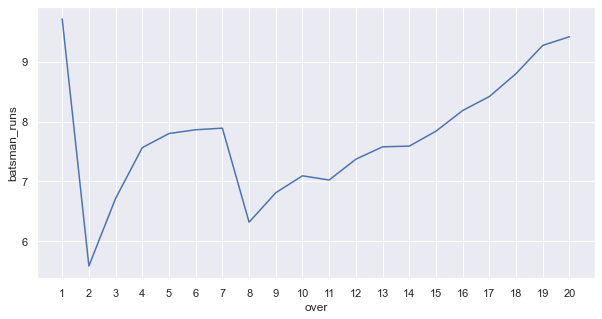

In [22]:
mean_runs = overwise_stats.groupby(['over'])['batsman_runs'].mean()
g = sns.lineplot(x=overwise_stats['over'], y=mean_runs, data=overwise_stats)
g.set_xticks(range(1,21))
g.set_xticklabels([str(i) for i in range(1,21)])

### Mean fall of wickets in each over

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20')]

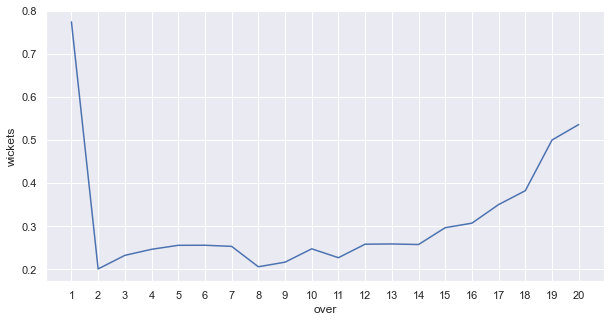

In [23]:
mean_fall_of_wickets = overwise_stats.groupby(['over'])['wickets'].mean()
g = sns.lineplot(x=overwise_stats['over'], y=mean_fall_of_wickets, data=overwise_stats)
g.set_xticks(range(1,21))
g.set_xticklabels([str(i) for i in range(1,21)])

In [24]:
def get_highest_scoring_batsman_in_match(match_id: int):
    subset = deliveries[deliveries['match_id'] == match_id]
    # group is a 'pandas.core.series.Series' object
    group = subset.groupby(['batsman'])['batsman_runs'].sum()
    highest = group[group == group.agg('max')]
    return highest

highest_scoring_batsman = {'id':[],'name':[],'runs_scored':[]}
for match in deliveries['match_id'].unique():
    data = get_highest_scoring_batsman_in_match(match)
    highest_scoring_batsman['id'].append(match)
    highest_scoring_batsman['name'].append(data.index[0])
    highest_scoring_batsman['runs_scored'].append(data[0])

highest_scoring_batsman_data = pd.DataFrame(highest_scoring_batsman)
merged = pd.merge(highest_scoring_batsman_data, match_data[['id','player_of_match']])
merged.head()

,id,name,runs_scored,player_of_match
0,1,Yuvraj Singh,62,Yuvraj Singh
1,2,SPD Smith,84,SPD Smith
2,3,CA Lynn,93,CA Lynn
3,4,BA Stokes,50,GJ Maxwell
4,5,KM Jadhav,69,KM Jadhav


In [25]:
print('Highest number of runs scored in a match is {} by {}'.format(merged['runs_scored'].max(), merged.iloc[merged['runs_scored'].idxmax()]['name']))

Highest number of runs scored in a match is 175 by CH Gayle


In [26]:
player_highest_runs = merged[merged['player_of_match']==merged['name']]
print("Matches when the highest scoring batsman is the player of the match is {}".format(len(player_highest_runs)))

Matches when the highest scoring batsman is the player of the match is 352


### Distribution of highest runs scored in a match

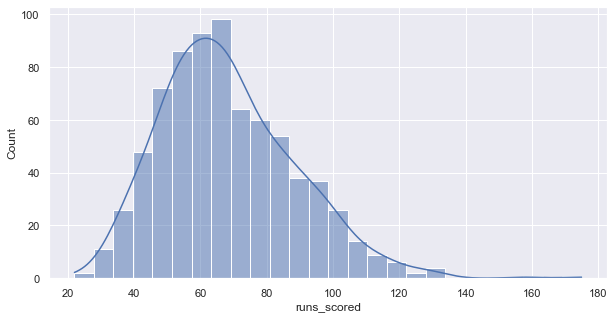

In [27]:
ax = sns.histplot(x='runs_scored', data=merged, kde=True)

# Model building

team1, team2, team1_toss_win, team1_toss_bat, team1_win, city, team1_runs

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
match_data_copy = match_data.copy(deep=True)
match_data_copy.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [30]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [31]:
# encoder = LabelEncoder()
# match_data['team1'] = encoder.fit_transform(match_data['team1'])
# match_data['team2'] = encoder.fit_transform(match_data['team2'])
# match_data['winner'] = encoder.fit_transform(match_data['winner'])
# match_data['toss_winner'] = encoder.fit_transform(match_data['toss_winner'])
# match_data['city'] = encoder.fit_transform(match_data['city'])


# match_data.head()

# match_data['team1_toss_win'] = 0
# match_data.loc[(match_data['toss_winner'] == match_data['team1']),"team1_toss_win"] = 1

# match_data['team1_toss_bat'] = 0
# match_data.loc[(match_data['toss_decision'] == "bat") & (match_data['team1_toss_win']==1),"team1_toss_bat"] = 1

# match_data['team1_win'] = 0
# match_data.loc[(match_data['winner'] == match_data['team1']),"team1_win"] = 1

# match_data.head()


# prediction_df = match_data[['team1','team2','team1_toss_win','team1_toss_bat','team1_win','city']]
# prediction_df.head()


# corr_matrix = prediction_df.drop('team1_win', axis=1).corr()
# corr_matrix


# X = prediction_df.drop('team1_win', axis=1)
# target = prediction_df['team1_win']
# target=target.astype(int)


# logReg=LogisticRegression(solver='lbfgs')
# rfe = RFE(logReg, verbose=1)
# rfe = rfe.fit(X, target.values.ravel())
# #Checking for the features of they are important
# print(rfe.support_)


# X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0,shuffle=True)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

batting_team, runs_scored, city, win%, cumulative_city_wins, toss_win,   

In [182]:
copy_overwise = overwise_stats.copy(deep=True)
copy_overwise.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
copy_overwise.head()

,match_id,inning,over,batting_team,bowling_team,extra_runs,wickets,batsman_runs,bowler,total_runs
0,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,0,4,TS Mills,7
1,1,1,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,15,A Choudhary,16
2,1,1,3,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,6,TS Mills,6
3,1,1,4,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,4,YS Chahal,4
4,1,1,5,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,9,S Aravind,9


In [183]:
copy_match = match_data.copy()
copy_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [184]:
obj = copy_overwise.groupby(['match_id','inning'])
obj.sum()

over  extra_runs  wickets  batsman_runs  total_runs
match_id inning                                                     
1        1        210           7        4           200         207
         2        210           6       10           166         172
2        1        210           8        8           176         184
         2        210           4        3           183         187
3        1        210           4        4           179         183
...               ...         ...      ...           ...         ...
11413    2        210           5        7           165         170
11414    1        210           8        9           147         155
         2        190          11        4           151         162
11415    1        210           3        8           149         152
         2        210           9        7           148         157

[1528 rows x 5 columns]

In [185]:
copy_match.loc[copy_match['id'] == 1]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [186]:
copy_overwise.rename(columns={'match_id':'id'}, inplace=True)

new_df = pd.merge(copy_overwise, copy_match, how='inner', on='id')
new_df.head()

,id,inning,over,batting_team,bowling_team,extra_runs,wickets,batsman_runs,bowler,total_runs,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,0,4,TS Mills,7,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,2,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,15,A Choudhary,16,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,3,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,6,TS Mills,6,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,4,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,4,YS Chahal,4,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,5,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0,9,S Aravind,9,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [192]:
new_new_df = new_df.loc[new_df['winner'] == new_df['batting_team']]
new_new_df = new_new_df[new_new_df['inning'] <= 2]
columns = ['id','inning','batting_team','toss_winner','toss_decision','city','winner','total_runs','wickets']
new_new_df = new_new_df[columns]
new_new_df.head()

,id,inning,batting_team,toss_winner,toss_decision,city,winner,total_runs,wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,7,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,16,1
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,6,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,4,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,9,0


In [194]:
new_new_df.groupby(['id','inning']).cumsum()

,total_runs,wickets
0,7,0
1,23,1
2,29,1
3,33,1
4,42,1
...,...,...
28945,113,5
28946,123,5
28947,139,5
28948,143,7


In [203]:
new_new_df['total_score'] = new_new_df.groupby(['id','inning']).cumsum()['total_runs']
new_new_df['fall_wickets'] = new_new_df.groupby(['id','inning']).cumsum()['wickets']

new_new_df.head(20)

,id,inning,batting_team,toss_winner,toss_decision,city,winner,total_runs,wickets,total_score,fall_wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,7,0,7,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,16,1,23,1
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,6,0,29,1
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,4,0,33,1
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,9,0,42,1
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,17,0,59,1
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,5,0,64,1
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,11,0,75,1
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,9,0,84,1
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,4,0,88,1


In [207]:
new_obj.nth(5)['fall_wickets'].unique()

array([1, 0, 2, 4, 3, 5], dtype=int64)

In [210]:
new_obj = new_new_df.groupby(['id','inning'])

columns = ['id','inning','batting_team','toss_winner','toss_decision','city','winner','total_score']

# Last over data
# final = new_obj.last()

# 6th over data
final = new_obj.nth(5)
final['final_20'] = new_obj.last()['total_score']
final.reset_index(inplace=True)
final.head()

,id,inning,batting_team,toss_winner,toss_decision,city,winner,total_runs,wickets,total_score,fall_wickets,final_20
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,17,0,59,1,207
1,2,2,Rising Pune Supergiants,Rising Pune Supergiants,field,Pune,Rising Pune Supergiants,16,0,59,1,187
2,3,2,Kolkata Knight Riders,Kolkata Knight Riders,field,Rajkot,Kolkata Knight Riders,20,0,73,0,184
3,4,2,Kings XI Punjab,Kings XI Punjab,field,Indore,Kings XI Punjab,8,1,56,2,164
4,5,1,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Bengaluru,Royal Challengers Bangalore,9,1,41,2,157


In [211]:
final['city'].value_counts()

Mumbai            101
Bengaluru          77
Kolkata            76
Delhi              72
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Ranchi              7
Port Elizabeth      7
Cape Town           6
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [212]:
final['batting_team'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           91
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             57
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: batting_team, dtype: int64

In [213]:
final.replace('Kochi Tuskers Kerala','Deccan Chargers', inplace=True)
final.replace('Delhi Capitals','Delhi Daredevils', inplace=True)
final.replace('Pune Warriors','Sunrisers Hyderabad', inplace=True)
final.replace('Gujarat Lions','Rajasthan Royals', inplace=True)
final.replace('Rising Pune Supergiants','Chennai Super Kings', inplace=True)

In [214]:
final['batting_team'].value_counts()

Chennai Super Kings            115
Mumbai Indians                 109
Kolkata Knight Riders           91
Rajasthan Royals                88
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Daredevils                76
Sunrisers Hyderabad             69
Deccan Chargers                 35
Name: batting_team, dtype: int64

### Winning team batting data

In [215]:
final.head()

,id,inning,batting_team,toss_winner,toss_decision,city,winner,total_runs,wickets,total_score,fall_wickets,final_20
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,17,0,59,1,207
1,2,2,Chennai Super Kings,Chennai Super Kings,field,Pune,Chennai Super Kings,16,0,59,1,187
2,3,2,Kolkata Knight Riders,Kolkata Knight Riders,field,Rajkot,Kolkata Knight Riders,20,0,73,0,184
3,4,2,Kings XI Punjab,Kings XI Punjab,field,Indore,Kings XI Punjab,8,1,56,2,164
4,5,1,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Bengaluru,Royal Challengers Bangalore,9,1,41,2,157


In [216]:
final['inning'].unique()

array([1, 2], dtype=int64)

In [217]:
final.to_csv('./dataset/ipl/prediction_df.csv')

## Model formulation

In [108]:
X = final.drop(columns=['id','toss_winner','winner','total_score','city','toss_decision'])
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,inning,total_runs,batting_team_Deccan Chargers,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad
0,1,16,0,0,0,0,0,0,0,1
1,2,15,0,0,0,0,0,0,0,0
2,2,22,0,0,0,1,0,0,0,0
3,2,7,0,0,1,0,0,0,0,0
4,1,7,0,0,0,0,0,0,1,0


In [109]:
Y = final['total_score']
Y.head()

0    207
1    187
2    184
3    164
4    157
Name: total_score, dtype: int64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (601, 10)
X_test shape:  (151, 10)
y_train shape:  (601,)
y_test shape:  (151,)


In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [112]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter.transpose()

,inning,total_runs,batting_team_Deccan Chargers,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad
Coefficient,-20.781826,1.28298,-10.470258,3.458379,2.818692,0.423519,0.124577,4.515205,5.036767,-1.753316


In [113]:
predictions = model.predict(X_test)
predictions[:5]

array([160.69818403, 144.44295993, 184.04597008, 157.51550741,
       169.67904572])

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='total_score'>

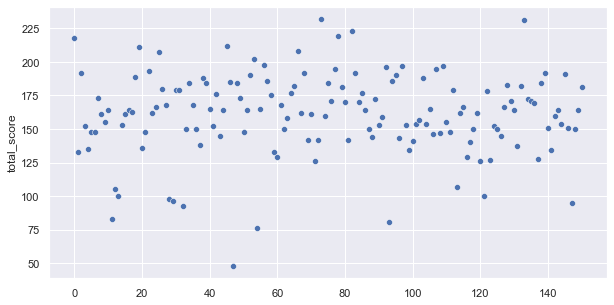

In [114]:
sns.scatterplot(range(len(y_test)),y_test)

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_score'>

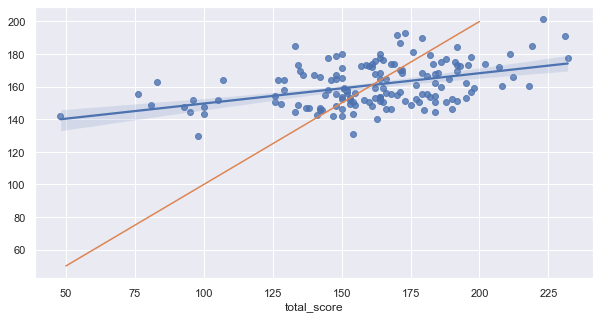

In [115]:
sns.regplot(y_test,predictions)

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)

MSE:  762.0453458668381
R2 Score:  0.18194110189670554


In [117]:
X

,inning,total_runs,batting_team_Deccan Chargers,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad
0,1,16,0,0,0,0,0,0,0,1
1,2,15,0,0,0,0,0,0,0,0
2,2,22,0,0,0,1,0,0,0,0
3,2,7,0,0,1,0,0,0,0,0
4,1,7,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
747,2,6,0,0,0,0,1,0,0,0
748,2,6,0,0,0,0,1,0,0,0
749,2,8,0,1,0,0,0,0,0,0
750,2,11,0,0,0,0,0,0,0,0


In [118]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [119]:
predictions = regressor.predict(X_test)
predictions[:5]

array([147.        , 144.22222222, 174.375     , 155.83333333,
       186.        ])

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_score'>

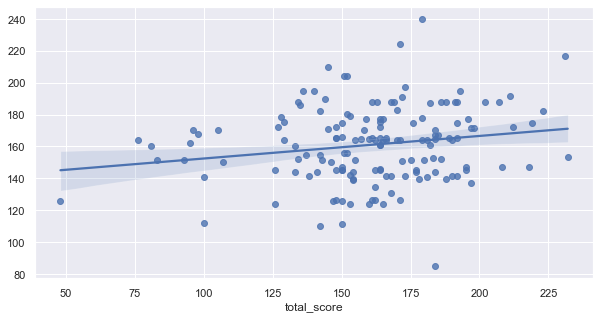

In [120]:
sns.regplot(y_test,predictions)

In [121]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)

MSE:  1217.8315452301138
R2 Score:  -0.3073473086212746


## KNN Regressor

In [166]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=24)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24)

In [167]:
predictions = model.predict(X_test)
predictions[:5]

array([171.75      , 148.625     , 180.125     , 162.29166667,
       190.375     ])

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_score'>

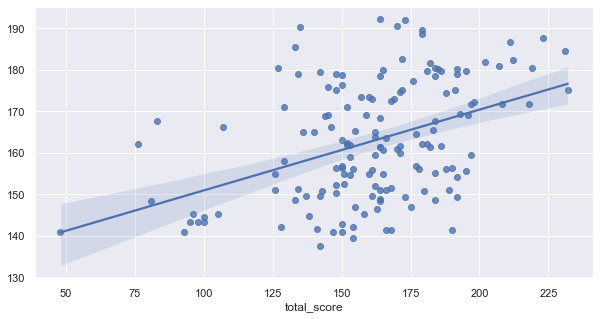

In [168]:
sns.regplot(y_test,predictions)

In [169]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)

MSE:  770.7095865526122
R2 Score:  0.17264000291782067


RMSE vs K values

In [172]:
k = []
rmse = []
r2s = []
for i in range(3, 30):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test.values, predictions)
    mse = mean_squared_error(y_test.values, predictions)
    _rmse = np.sqrt(mse)
    k.append(i)
    rmse.append(_rmse)
    r2s.append(r2)

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

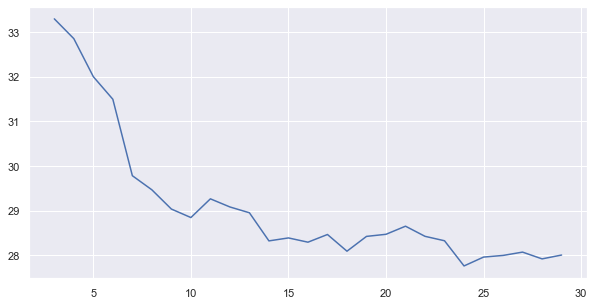

In [173]:
sns.lineplot(k, rmse)